# 다중 출력 시계열 회귀

- 타겟변수 y가 하나의 값을 갖는 것이 아니라 다수의 값(시계열)을 갖는 경우

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [125]:
from numpy.random import rand, randn

## 입력 및 출력 데이터 생성
- 시스템의 입력과 출력 데이터 생성 함수
- y가 시계열 데이터인 경우

In [126]:
x = np.arange(12); print(x)
y = np.cumsum(x); y

[ 0  1  2  3  4  5  6  7  8  9 10 11]


array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45, 55, 66])

In [130]:
def gen_random_xy(n_steps=30):
    a = 0.5 + rand() # 0.5 ~ 1.5 사이의 임의의 레벨 선택
    xs = np.linspace(0,6,n_steps)
    ys = -0.1*a*xs*(xs -6) # y = -a*x(x-6) 거리가 6 나가는 포물선
    out = np.cumsum(ys**2 + 0.5*xs*rand(n_steps)) # x**2 값 적분 및 노이지 추가
    return ys, out

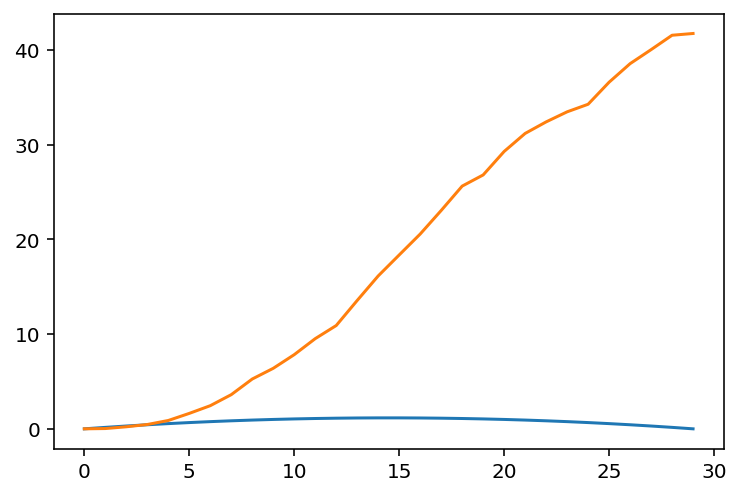

In [131]:
in_x, out = gen_random_xy(30)
plt.plot(in_x)
plt.plot(out); plt.show()

In [132]:
# 입력 및 출력 데이터 샘플 생성
N = 200 # 입력 샘플 수
n_steps = 30
X, y = [],[]
for i in range(N):
    in_x, out = gen_random_xy(n_steps)
    X.append(in_x)
    y.append(out)
X = np.array(X)
y = np.array(y)

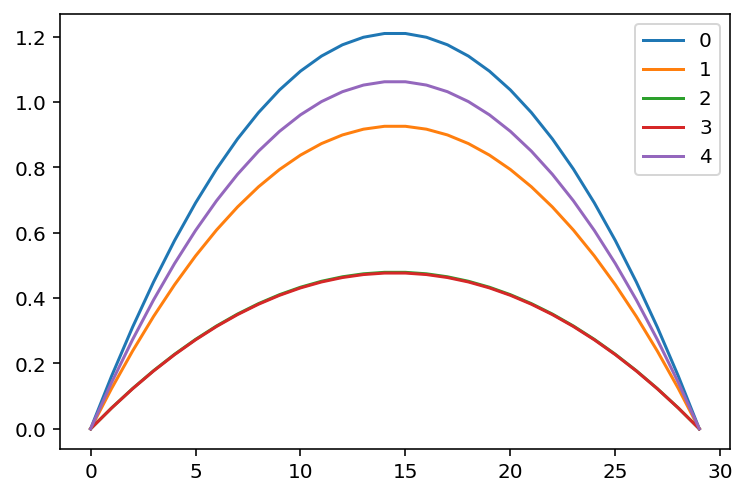

In [133]:
for i in range(5):
    plt.plot(X[i], label=str(i))
    plt.legend()

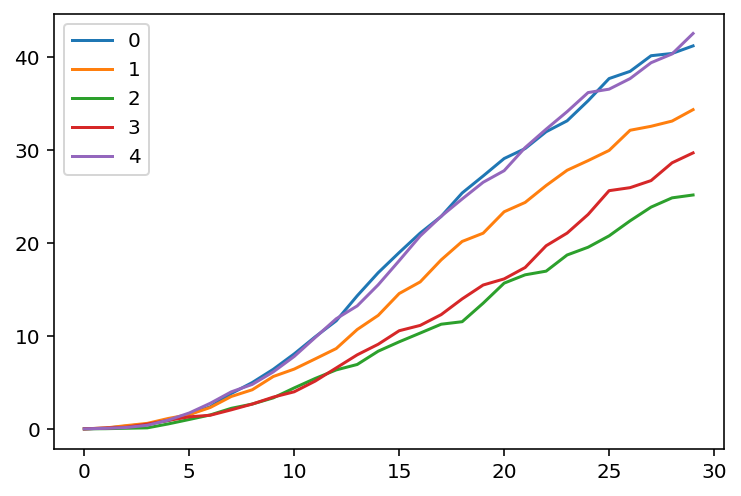

In [134]:
for i in range(5):
    plt.plot(y[i], label=str(i))
    plt.legend()

In [135]:
X.shape, y.shape

((200, 30), (200, 30))

In [136]:
X_all = X.copy()

### 모든 입력 데이터를 사용한 다중회귀 예측

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, random_state=9)

In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20)

## 컬럼별로 r2 구하기
- 30개의 컬럼(시계열 데이터)이 있다
- 각 컬럼별로 r2 구하기

In [139]:
x = np.arange(24).reshape(6,4)
print(x)
# (1)
x.mean(axis=0) # 세로방향, 컬럼별 연산(평균, r2 등) 다중 목적 변수 y1, y2, y3, y4)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


array([10., 11., 12., 13.])

In [140]:
# (2)
x.mean(axis=1) # 가로방향, 행단위 연산(평균, r2 등을 구할 때도 있다) - 향후 12개월 매출 예측

array([ 1.5,  5.5,  9.5, 13.5, 17.5, 21.5])

In [141]:
y_pred = rfr.predict(X_test)
# 아래는 의미 없는 결과

r2_score(y_test, y_pred, multioutput="raw_values")

array([ 1.        , -0.35101746, -0.36295376,  0.05836762,  0.2732503 ,
        0.55031578,  0.64142521,  0.73882366,  0.81703189,  0.86404704,
        0.8836209 ,  0.88646639,  0.90331155,  0.92534606,  0.91453864,
        0.90397621,  0.90851773,  0.89981582,  0.9042283 ,  0.8987644 ,
        0.89867915,  0.91469678,  0.91199509,  0.88262065,  0.8679579 ,
        0.86682774,  0.85866083,  0.85684107,  0.83076044,  0.81744319])

In [142]:
r2_score(y_test, y_pred, multioutput="raw_values").mean()

0.7321453036271137

## 행별로 R2 구하기
- 샘플별, 시계열 데이터를 대상으로 r2 구하기

In [143]:
y_test.shape

(50, 30)

In [144]:
r2_score(y_test.T, y_pred.T, multioutput="raw_values")

array([0.9769006 , 0.9659934 , 0.92709559, 0.99221034, 0.97693111,
       0.97427059, 0.9704304 , 0.92749253, 0.96984801, 0.99066493,
       0.96030283, 0.99094767, 0.98369388, 0.95993383, 0.99310957,
       0.86501217, 0.97626665, 0.97857566, 0.98538287, 0.99791706,
       0.99506211, 0.99265716, 0.96637813, 0.99676242, 0.97238401,
       0.91767124, 0.99660153, 0.96414846, 0.99753169, 0.9851961 ,
       0.94220326, 0.99024331, 0.97911835, 0.98967142, 0.99200698,
       0.98396118, 0.98725621, 0.91275676, 0.98710957, 0.9173397 ,
       0.9900594 , 0.99512747, 0.98795464, 0.99111545, 0.9943513 ,
       0.99601722, 0.97855135, 0.99509126, 0.99772103, 0.99745758])

In [145]:
r2_score(y_test.T, y_pred.T, multioutput="raw_values").mean()

0.975049719556423

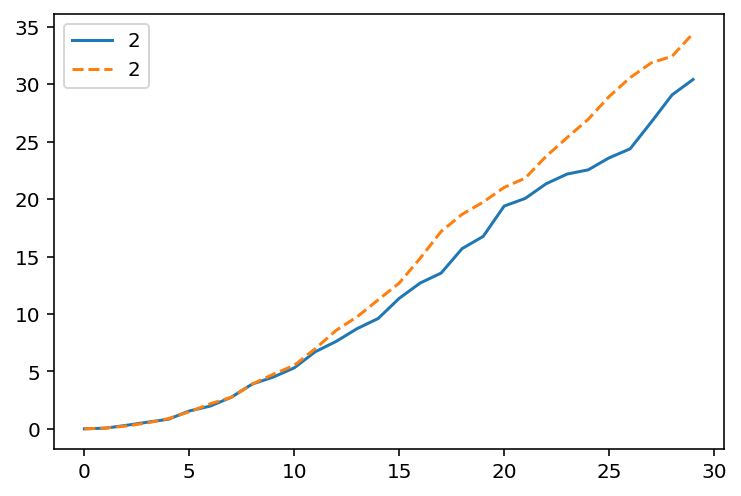

In [146]:
# 실제값과 예측치 (행 단위)
for i in range(2,3):
    plt.plot(y_test[i], label=str(i))
    plt.plot(y_pred[i], '--', label=str(i))
    plt.legend()

### 입력으로 30개가 아닌 일부 샘플만 사용하는 경우

In [147]:
X.shape

(200, 30)

In [148]:
# 일부 샘플 5개만 사용하는 경우
# n_interval = 5
# xn = np.int(n_steps/n_interval)
# x_sample = [xn*(i+1)-1 for i in range(n_interval)]

# 5개 위치 샘플만 입력(X)으로 사용

x_sample = [5, 11, 17, 23, 29]
X_part = X[:,x_sample]

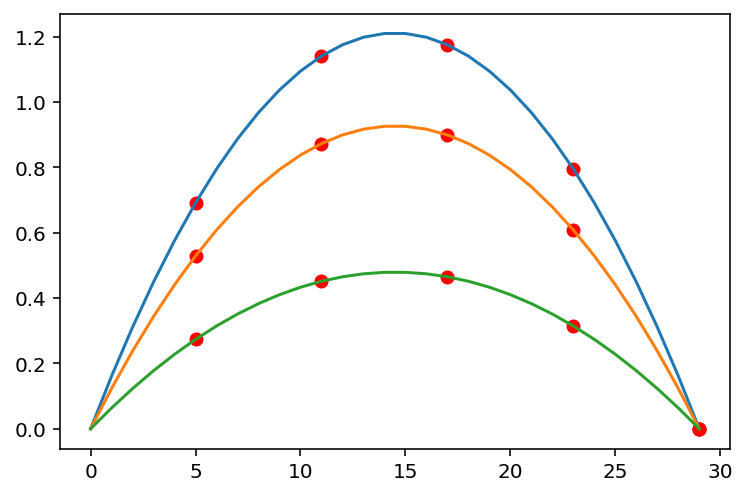

In [149]:
for i in range(3):
    plt.plot(X[i])
    plt.scatter(x_sample, X_part[i], c='r')

### 성능 비교

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_part, y, random_state=9)
X_train.shape, y_train.shape

((150, 5), (150, 30))

In [151]:
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

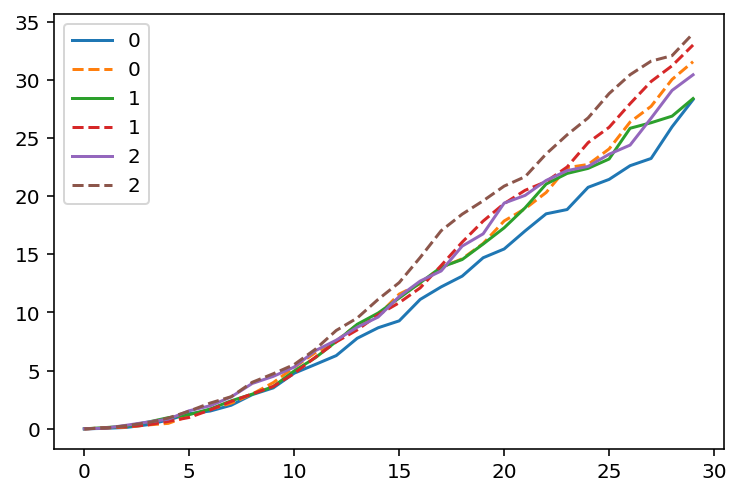

In [152]:
for i in range(3):
    plt.plot(y_test[i], label=str(i))
    plt.plot(y_pred[i], '--', label=str(i))
    plt.legend()

In [153]:
r2_score(y_test.T, y_pred.T, multioutput="raw_values").mean()

0.9746863061247844

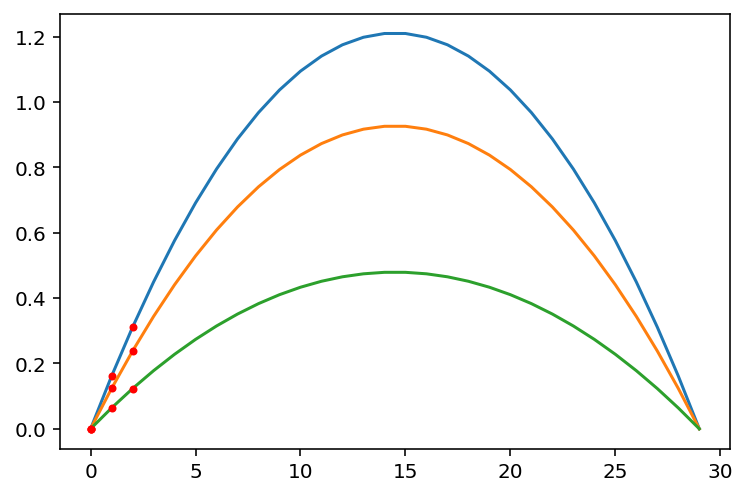

In [154]:
# 다른 예제: 앞 부분의 일부(5개) 샘플만 사용하는 경우
X_part = X[:,:3]
for i in range(3):    
    plt.plot(X[i])
    plt.plot(X_part[i], 'r.')

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X_part, y, random_state=9)
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
r2_score(y_test.T, y_pred.T, multioutput="raw_values").mean()

0.9738538859121485

In [156]:
X_test.shape, y_test.shape

((50, 3), (50, 30))